In [1]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


#import all functions created in acquire , prepare & explore
import prepare
import acquire
import model
#import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read TELCO data from MySQL using the get_telco_data() function in acquire.py

In [3]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
#initial data summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [7]:
# Clean, Prep and Split df

In [ ]:
# Drop duplicate columns
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [ ]:
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [ ]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [ ]:
 # Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [ ]:
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [ ]:
 # Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# Drop unnecessary columns
df.drop(columns=['gender','partner','dependents','phone_service', \
                     'multiple_lines','online_security','online_backup', \
                     'device_protection','tech_support','streaming_tv', \
                     'streaming_movies','paperless_billing'], inplace=True)

In [8]:
#combine all to a function and add to prepare.py
def prep_telco_data(df):
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype(float)
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.replace({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df.drop(columns=['gender','partner','dependents','phone_service', \
                     'multiple_lines','online_security','online_backup', \
                     'device_protection','tech_support','streaming_tv', \
                     'streaming_movies','paperless_billing'], inplace=True)
    return df

In [9]:
df = prep_telco_data(df)

In [164]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   churn                                  7032 non-null   object 
 5   contract_type                          7032 non-null   object 
 6   internet_service_type                  7032 non-null   object 
 7   payment_type                           7032 non-null   object 
 8   gender_encoded                         7032 non-null   int64  
 9   partner_encoded                        7032 non-null   int64  
 10  dependents_encoded                     7032 non-null   int64  
 11  phon

In [165]:
df.churn_encoded.value_counts()

0    5163
1    1869
Name: churn_encoded, dtype: int64

In [166]:
#overall churn rate of df set
df.churn_encoded.mean()

0.26578498293515357

Text(0.5, 0, 'Churned')

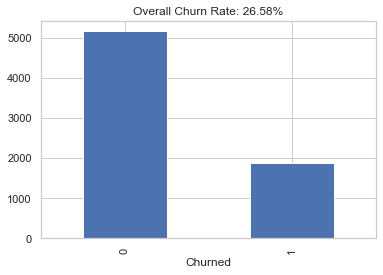

In [167]:
df.churn_encoded.value_counts().sort_index().plot.bar()
churn_rate = df.churn_encoded.mean()
plt.title(f"Overall Churn Rate: {churn_rate:.2%}")
plt.xlabel('Churned')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

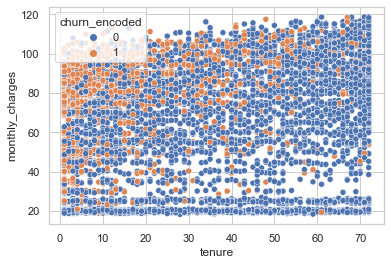

In [168]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x="tenure", y="monthly_charges", hue="churn_encoded", data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

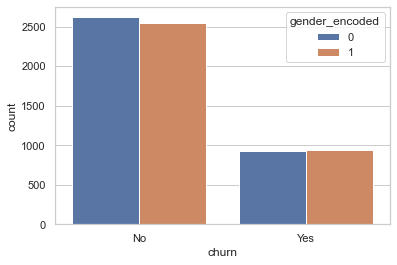

In [169]:
sns.countplot(x="churn", data=df, hue="gender_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

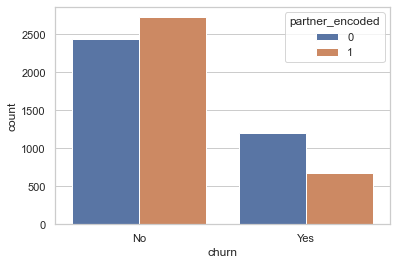

In [170]:
sns.countplot(x="churn", data=df, hue="partner_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

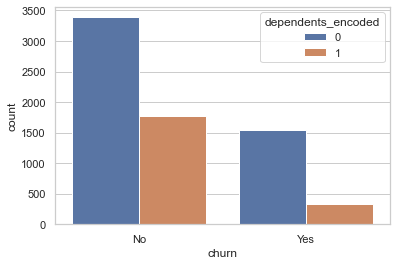

In [171]:
sns.countplot(x="churn", data=df, hue="dependents_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

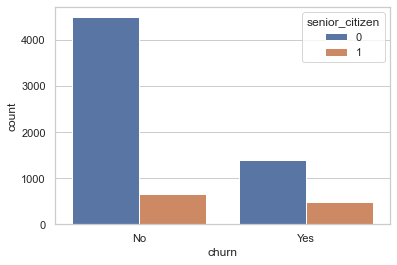

In [172]:
sns.countplot(x="churn", data=df, hue="senior_citizen")

<AxesSubplot:xlabel='churn', ylabel='count'>

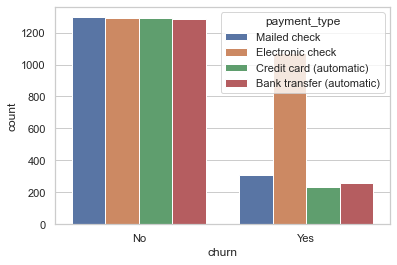

In [173]:
#electronic check has the highest rate of churn
sns.countplot(x="churn", data=df, hue="payment_type")

<AxesSubplot:xlabel='churn', ylabel='count'>

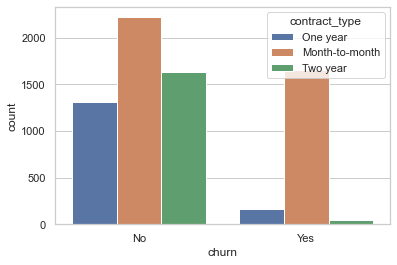

In [174]:
#month to month has the highest rate of churn
sns.countplot(x="churn", data=df, hue="contract_type")

<AxesSubplot:xlabel='churn', ylabel='count'>

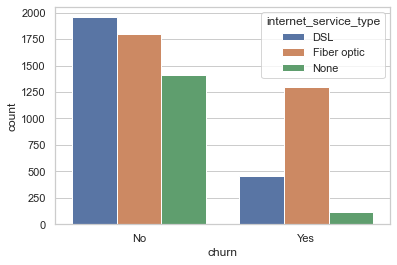

In [182]:
#fiber optic has the highest rate of churn
sns.countplot(x="churn",  data=df, hue="internet_service_type") 

<AxesSubplot:xlabel='tenure', ylabel='internet_service_type'>

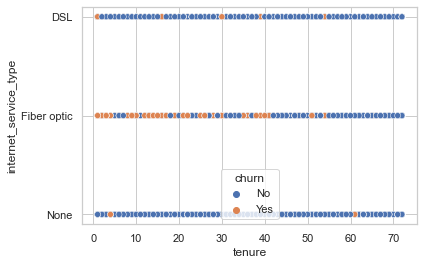

In [177]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x="tenure", y="internet_service_type", hue="churn", data=df)

In [191]:
features = ['internet_service_type', 'contract_type', 'payment_type', 'senior_citizen']

In [192]:
list(enumerate(features))

[(0, 'internet_service_type'),
 (1, 'contract_type'),
 (2, 'payment_type'),
 (3, 'senior_citizen')]

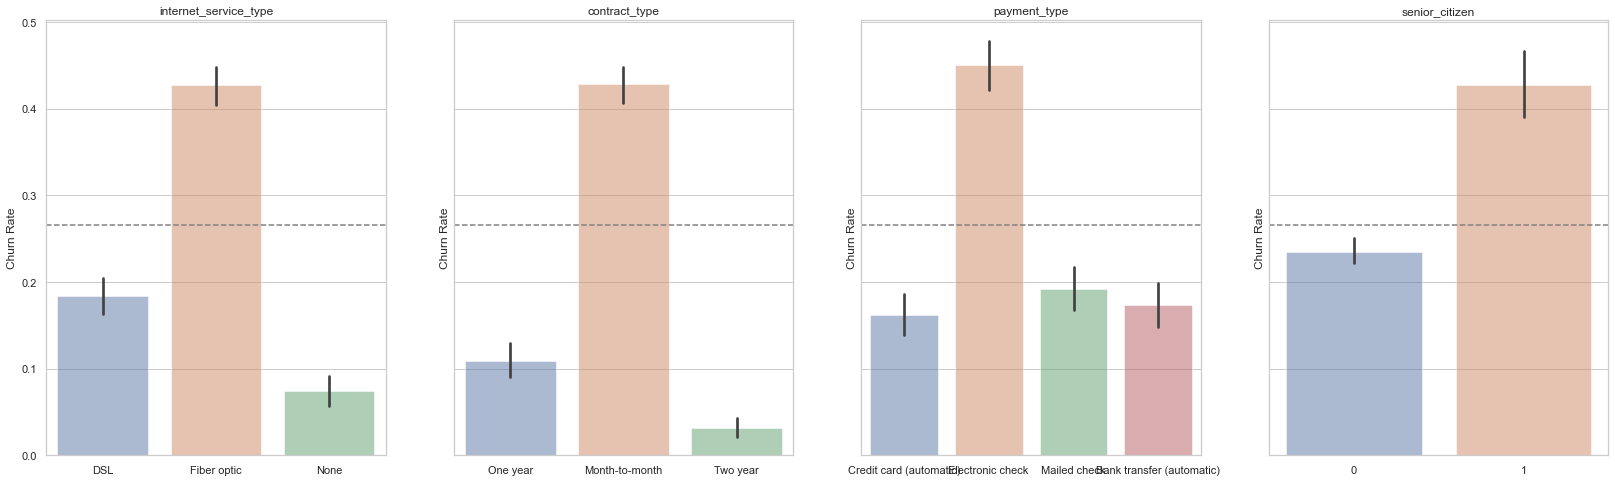

In [193]:
churn_rate = df.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(28, 8), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

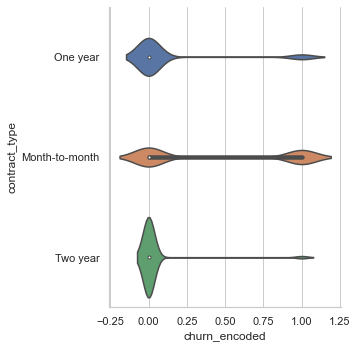

In [194]:
# Catplot with kind="count"
sns.set_theme(style="whitegrid")
sns.catplot(x="churn_encoded", y="contract_type", data=df, kind="violin")

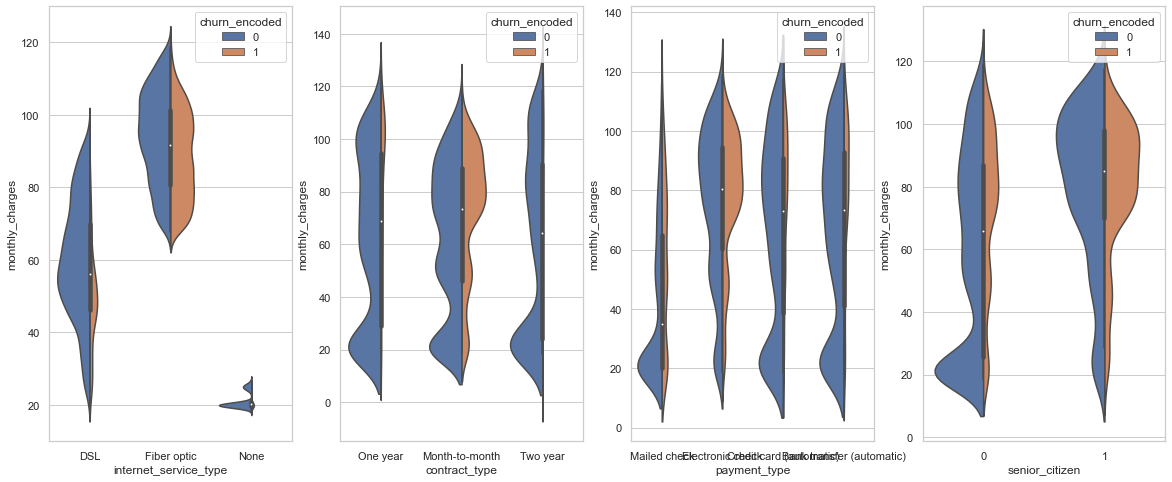

In [197]:
#shows that there is a higher cost of service for fiber optic, high churn, my guess is those are month to month paid with echeck
features = ['internet_service_type', 'contract_type', 'payment_type','senior_citizen']
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="churn_encoded",
        data=df,
        split=True,
        scale = 'count',
        ax=ax[i],
        
    )

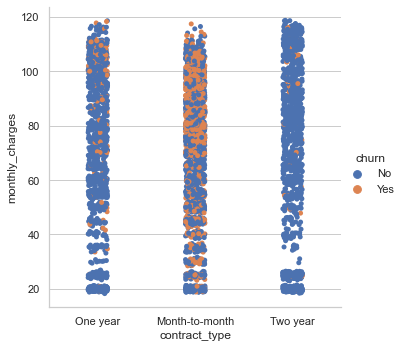

In [198]:
# Using a Catplot, month to month with charges over 60, high churn
sns.catplot(x="contract_type", y="monthly_charges", data=df, hue="churn")

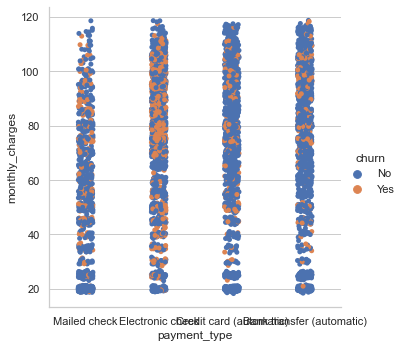

In [200]:
#electronic check with charges over 60, high churn
sns.catplot(x="payment_type", y="monthly_charges", data=df, hue="churn")

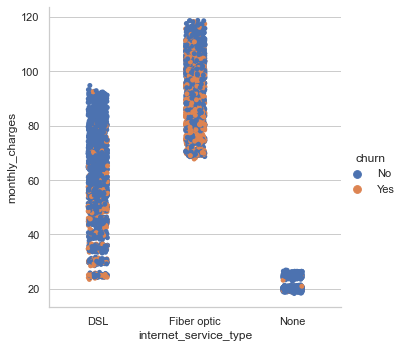

In [201]:
# Using a Catplot
sns.catplot(x="internet_service_type", y="monthly_charges", data=df, hue="churn")

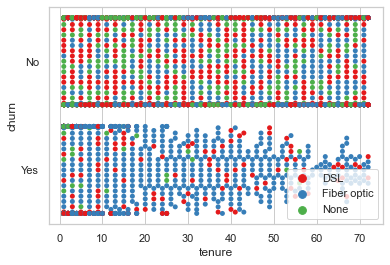

In [203]:
sns.swarmplot(x="tenure", y="churn", data=df, hue="internet_service_type", palette="Set1")
plt.legend()

(0.0, 73.0)

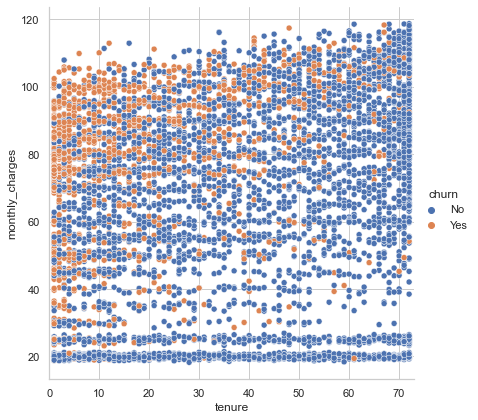

In [204]:
#churn is happening sub 10 month tenure, meaning month to month contract has highest churn
sns.relplot(x="tenure", y="monthly_charges", hue="churn", data=df, height=6, aspect=1)
plt.xlim(0, 73)

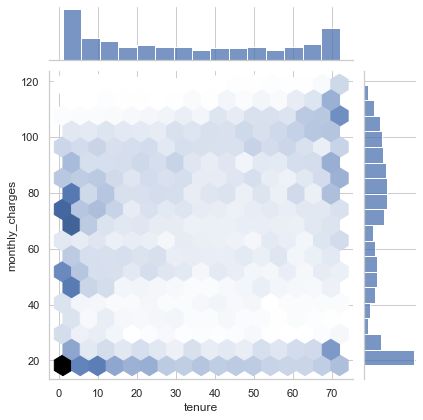

In [285]:
#low tenure, high monthly cost more churn
sns.jointplot("tenure", "monthly_charges", data=df, kind='hex')

In [206]:
#electronic check customers make up 33.6% of customer base and churn at 15.2%
pd.crosstab(df.churn, df.payment_type, margins=True, normalize=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.182594,0.183305,0.184016,0.1843,0.734215
Yes,0.036689,0.032992,0.152304,0.0438,0.265785
All,0.219283,0.216297,0.336320,0.2281,1.000000


In [209]:
#MTM make up 55.1% of customer base and churn at 23.5%
pd.crosstab(df.churn, df.contract_type, margins=True, normalize=True)

contract_type,Month-to-month,One year,Two year,All
churn,,,,
No,0.315700,0.185722,0.232793,0.734215
Yes,0.235353,0.023606,0.006826,0.265785
All,0.551052,0.209329,0.239619,1.000000


In [208]:
#fiber optic customers make up 44.0% of customer base and churn at 18.4%
pd.crosstab(df.churn, df.internet_service_type, margins=True, normalize=True)

internet_service_type,DSL,Fiber optic,None,All
churn,,,,
No,0.278299,0.255830,0.200085,0.734215
Yes,0.065273,0.184443,0.016069,0.265785
All,0.343572,0.440273,0.216155,1.000000


In [213]:
#senior citizens are 16.2% of customer base and churn at 41.7%
pd.crosstab(df.churn, df.senior_citizen, margins=True, normalize=True)

senior_citizen,0,1,All
churn,,,
No,0.639505,0.094710,0.734215
Yes,0.198094,0.067691,0.265785
All,0.837600,0.162400,1.000000


In [219]:
#Median tenure for churn customers is 10 months
df[df.churn == 'Yes'].tenure.median()

10.0

In [223]:
#mean tenure, outliers towards the high end, go with median
df[df.churn == 'Yes'].tenure.mean()

17.979133226324237

In [242]:
df[df.churn == 'Yes'].tenure.describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [243]:
df[df.churn == 'No'].tenure.describe()

count    5163.00000
mean       37.65001
std        24.07694
min         1.00000
25%        15.00000
50%        38.00000
75%        61.00000
max        72.00000
Name: tenure, dtype: float64

In [296]:
df[df.internet_service_type == 'Fiber optic'].tenure.describe()

count    3096.000000
mean       32.917959
std        24.425332
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

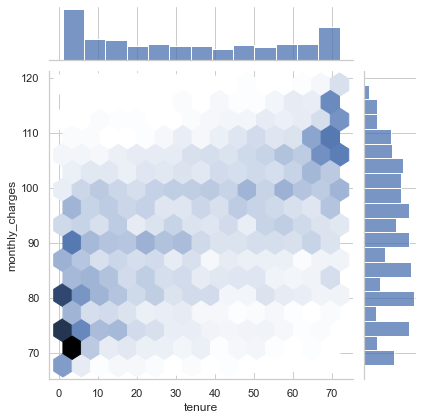

In [298]:
sns.jointplot("tenure", "monthly_charges", data=df[df.internet_service_type == 'Fiber optic'], kind='hex')

In [240]:
#churners pay 13.1$ more per month
df[df.churn == 'Yes'].monthly_charges.describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthly_charges, dtype: float64

In [245]:
df[df.churn == 'No'].monthly_charges.describe()

count    5163.000000
mean       61.307408
std        31.094557
min        18.250000
25%        25.100000
50%        64.450000
75%        88.475000
max       118.750000
Name: monthly_charges, dtype: float64

In [248]:
churners = df[df.churn == 'Yes']
churners

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2,0,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1
18,1,45,62.70,2791.50,Yes,One year,DSL,Credit card (automatic),0,0,...,0,0,1,1,0,0,0,1,0,0
19,1,1,25.10,25.10,Yes,Month-to-month,DSL,Electronic check,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,21,96.80,2030.30,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0,0,...,1,0,1,0,0,1,0,0,0,0
7023,1,9,83.85,790.15,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,1,0,0,1,0,0,1,0
7036,0,1,70.15,70.15,Yes,Month-to-month,Fiber optic,Mailed check,1,0,...,0,0,0,0,0,1,0,0,0,1
7037,0,4,20.95,85.50,Yes,Month-to-month,None,Bank transfer (automatic),1,0,...,0,1,0,0,0,0,1,0,0,0


In [250]:
churners.internet_service_type == 'Fiber optic'

2        True
3        True
4        True
18      False
19      False
        ...  
7020     True
7023     True
7036     True
7037    False
7039     True
Name: internet_service_type, Length: 1869, dtype: bool

In [314]:
churners[churners.internet_service_type == 'Fiber optic'].tenure.median()

13.0

In [315]:
churners[churners.contract_type == 'Month-to-month'].tenure.median()

7.0

In [319]:
churners[churners.payment_type == 'Electronic check'].tenure.median()

9.0

In [320]:
df.monthly_charges.mean()

64.7982081911263

In [321]:
churners.monthly_charges.mean()

74.44133226324232

In [322]:
churners[churners.contract_type == 'Month-to-month'].monthly_charges.mean()

73.01939577039263

In [323]:
churners[churners.payment_type == 'Electronic check'].monthly_charges.mean()

78.70098039215678

In [324]:
churners[churners.internet_service_type == 'Fiber optic'].monthly_charges.mean()

88.12648419429449

In [328]:
churners[churners.senior_citizen == 1].monthly_charges.mean()

80.71344537815128

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

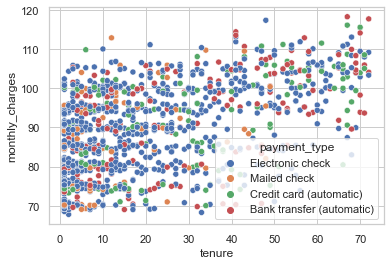

In [263]:
sns.scatterplot(x="tenure", y="monthly_charges", data=fiber_churn, hue="payment_type")

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

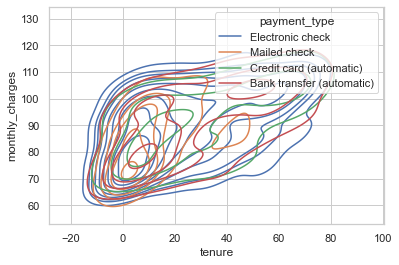

In [295]:
sns.kdeplot(x="tenure", y="monthly_charges", data=fiber_churn, hue="payment_type",kind='kde')

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

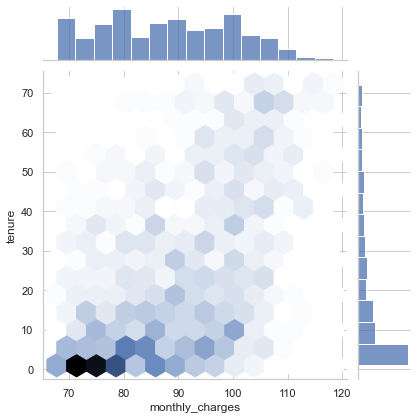

In [283]:
sns.jointplot("monthly_charges", "tenure", data=fiber_churn, kind='hex')

In [ ]:
# Statistical Testing

# Experiments should be reproducible: If someone runs through the experiment with the same data, they should get the same results. If someone runs through the experiment with another sample of the data, they should arrive at the same conclusion.
# Experiments should be documented succintly and focusing on the essential aspects of the tasks involved.
# Experiment: Compare two groups: Is the age of survivors significantly different from that of the non-survivors?

# Ho: the difference in age between subset A, survivors, and subset B, non-survivors, is insubstantial (basically 0).
# Ha: the difference between subset A, survivors, and subset B, non-survivors is substantial
# Test if the observations with survivors (subset A) has significantly different ages than that of non-survivors (subset B).
# If there is a difference, then Age is a good choice to keep as a feature.
# We can use a t-test here, as Age is somewhat normally distributed.

In [ ]:
# Types of Distributions
# Uniform distributions have equal likelyhoods amont all outcomes, like a fair coin.
# Binomial distributions are all about determining a binary outcome of an event. Success/failure, for example
# Normal distributions model a continuous random variable.
# Poisson distributions a certain amount of events occuring over a time interval
 
# Working With Distribution Objects from scipy.stats
# Consider the situation at hand and determine the appropriate distribution type.
# Create the distribution object using the stats module from scipy.
# Ask yourself what information you have and what information you need.
# Utilize the diagram below to call the appropriate distribution. Hey Python, you do the calculus!
# Because these distribution objects represent the distribution itself and not specific numbers, use the 
# rvs method if you need to generate actual random numbers (for visualizing or using to produce simulation experiments)

In [ ]:
def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

In [ ]:
def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

In [ ]:
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

In [157]:
cat_vars = ['churn', 'contract_type', 'internet_service_type', 'payment_type', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

quant_vars = ['tenure', 'monthly_charges', 'churn_encoded']

In [163]:
# sns.pairplot(train, hue="churn_encoded")

In [160]:
#makesure the target variable is separated from x
X_train = train.drop(columns=["churn","churn_encoded"])
y_train = train.churn_encoded

X_validate = validate.drop(columns=["churn","churn_encoded"])
y_validate = validate.churn_encoded

X_test = test.drop(columns=["churn","churn_encoded"])
y_test = test.churn_encoded

In [161]:
y_train.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [162]:
#baseline
baseline = y_train.mode()
#boolean to match baseline prediction and reality
matches_baseline_prediction = (y_train==0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}") 

Baseline accuracy: 0.73


In [ ]:
#split the data
train, validate, test = prepare.split_telco_data(df)

In [ ]:
train.head()

In [ ]:
df = prepare.prep_telco_data(df)

In [ ]:
df.head()